Secure Water Treatment

In [1]:
import warnings
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matrixprofile as mp
from PIL import Image
warnings.filterwarnings('ignore')

print("Fin import")

Fin import


In [2]:
df_SWaT = pd.read_csv(
  'D:\Datasets\SWaT\SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Attack_v0_CSV.csv')
df_SWaT.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,"2,427057","522,8467",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,5988","0,000128152",1,1,1,Normal
2,28/12/2015 10:00:01 AM,"2,446274","522,886",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,6789","0,000128152",1,1,1,Normal
3,28/12/2015 10:00:02 AM,"2,489191","522,8467",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6789","0,000128152",1,1,1,Normal
4,28/12/2015 10:00:03 AM,"2,53435","522,9645",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6148","0,000128152",1,1,1,Normal
5,28/12/2015 10:00:04 AM,"2,56926","523,4748",2,2,1,"262,0161","8,394514","328,6337","2,443085",...,2,1,"250,8812","1,649953","189,5027","0,000128152",1,1,1,Normal
6,28/12/2015 10:00:05 AM,"2,609294","523,8673",2,2,1,"262,0161","8,394514","328,6337","2,44411",...,2,1,"250,753","1,649953","189,5027","0,000128152",1,1,1,Normal
7,28/12/2015 10:00:06 AM,"2,637158","524,1028",2,2,1,"262,0161","8,394514","328,6337","2,44411",...,2,1,"250,5928","1,649953","189,5027","0,000128152",1,1,1,Normal
8,28/12/2015 10:00:07 AM,"2,652211","524,2206",2,2,1,"262,0161","8,394514","328,6337","2,441803",...,2,1,"250,5928","1,649953","189,5027","0,000128152",1,1,1,Normal
9,28/12/2015 10:00:08 AM,"2,655735","524,4954",2,2,1,"262,0161","8,394514","328,6337","2,441803",...,2,1,"250,9132","1,649953","189,5027","0,000128152",1,1,1,Normal


In [3]:
df_attack = pd.read_csv(
  'D:\Datasets\SWaT\SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Attack_v0_CSV.csv',header=1)
df_normal = pd.read_csv(
  'D:\Datasets\SWaT\SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Normal_v0_CSV.csv',header=1)

In [4]:
df_attack.columns = list(map(lambda x: str(x).replace(' ', ''), list(df_attack.columns.values)))
df_normal.columns = list(map(lambda x: str(x).replace(' ', ''), list(df_normal.columns.values)))
print(df_attack.columns)
df_attack.head(5)

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,"2,427057","522,8467",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,5988","0,000128152",1,1,1,Normal
1,28/12/2015 10:00:01 AM,"2,446274","522,886",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,6789","0,000128152",1,1,1,Normal
2,28/12/2015 10:00:02 AM,"2,489191","522,8467",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6789","0,000128152",1,1,1,Normal
3,28/12/2015 10:00:03 AM,"2,53435","522,9645",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6148","0,000128152",1,1,1,Normal
4,28/12/2015 10:00:04 AM,"2,56926","523,4748",2,2,1,"262,0161","8,394514","328,6337","2,443085",...,2,1,"250,8812","1,649953","189,5027","0,000128152",1,1,1,Normal


In [5]:

df = pd.concat([df_normal[4500:14500],df_attack[115800:143500]])
df.reset_index(drop=True,inplace=True)
df.isnull().sum().sum()


df_SWaT2 = df.iloc[:,:-1]
#df_SWaT2 = df_SWaT2.rename(index = {0:"Sensor"})
df_SWaT2.loc[-1] = list(df_SWaT2.columns.values) # adding a row

df_SWaT2.index = df_SWaT2.index + 1  # shifting index
df_SWaT2 = df_SWaT2.sort_index()
df_SWaT2.tail()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
37696,30/12/2015 1:51:35 AM,"2,473817","714,7142",2,1,1,"234,2989","8,51051","321,456",0,...,"0,3084265",2,1,"248,7984","0,8009483","187,516",0,1,1,1
37697,30/12/2015 1:51:36 AM,"2,508728","714,2824",2,1,1,"234,2989","8,508588","321,456",0,...,"0,3065048",2,1,"248,7984","0,8009483","187,516",0,1,1,1
37698,30/12/2015 1:51:37 AM,"2,545559","714,361",2,1,1,"234,2989","8,508588","321,456",0,...,"0,3065048",2,1,"248,7984","0,8009483","187,516",0,1,1,1
37699,30/12/2015 1:51:38 AM,"2,583672","714,4787",2,1,1,"234,2989","8,508588","321,456",0,...,"0,3077859",2,1,"248,5901","0,8009483","187,516",0,1,1,1
37700,30/12/2015 1:51:39 AM,"2,619543","715,0675",2,1,1,"234,2989","8,508588","321,456",0,...,"0,3084265",2,1,"248,5901","0,8009483","187,516",0,1,1,1


In [6]:
def creation_sensor(name):
    sensora = df_attack[name].apply(lambda x: str(x).replace(',', '.')).astype('float32')
    sensorn = df_normal[name].apply(lambda x: str(x).replace(',', '.')).astype('float32')
    sensor = pd.concat([sensorn[4500:14500],sensora[115800:143500]],ignore_index=True)
    return sensor

def matrix_profile(sensor_values,window):
    p = mp.compute(sensor_values,windows=window,n_jobs=-1)
    discord = mp.discover.discords(p,exclusion_zone=0,k=3)
    #mp.visualize(p)

    return discord

def Lerp(value,a,b):
    return (value-b)/(a - b)

In [7]:
list0 = [0]*37700
for k in range(37700):
    if k%1500==0:
        list0[k:k+50] = [3]*50

list1 = [0]*37700
for k in range(20000):
    if k%2500==0:
        list1[k:k+50] = [3]*50
for k in range(20000,37700):
    if (k+500)%2500==0:
        list1[k:k+50] = [3]*50

list2 = [0]*37700
for k in range(37700):
    if k%2500==0:
        list2[k:k+50] = [3]*50
for k in range(20000,21000):
    list2[k:k+50] = [3]*50

list4 = [0]*37700
for k in range(37700):
    if k%1500==0:
        list4[k:k+50] = [3]*50

list_training_alert0 = [0]*37700
list_training_alert1 = [0]*37700
list_training_alert2 = [0]*37700
list_training_alert3 = [0]*37700

list_training_alert1[20000:25000]=[1]*5000
list_training_alert2[19000:21000]=[1]*2000
list_training_alert3[20000:25000]=[1]*5000

In [8]:
list_sensors = []

for k in range(1,52):
    sensor_values = list(map(lambda x: float(str(x).replace(',', '.')), df_SWaT2.iloc[1:,k].tolist()))
    sensor_name = str(df_SWaT2.iloc[0,k]).replace(' ','')
    sensor = {"Name": sensor_name, "Values": sensor_values}

    list_sensors.append(sensor)
list_sensors.append({"Name": "Training0", "Values": list0})
list_sensors.append({"Name": "Training1", "Values": list1})
list_sensors.append({"Name": "Training2", "Values": list2})
list_sensors.append({"Name": "Training3", "Values": list0})
ListSensors = {"Sensors": list_sensors}
print(len(ListSensors["Sensors"][0]["Values"]))
with open('D:\_ProjetsUnity\ProjetVisus\Assets\Resources\SWaT3000.json', 'w') as f:
    json.dump(ListSensors, f)

37700


In [9]:
for k in range(len(ListSensors["Sensors"])):
    print(str(k) + " : " + ListSensors["Sensors"][k]["Name"])

0 : FIT101
1 : LIT101
2 : MV101
3 : P101
4 : P102
5 : AIT201
6 : AIT202
7 : AIT203
8 : FIT201
9 : MV201
10 : P201
11 : P202
12 : P203
13 : P204
14 : P205
15 : P206
16 : DPIT301
17 : FIT301
18 : LIT301
19 : MV301
20 : MV302
21 : MV303
22 : MV304
23 : P301
24 : P302
25 : AIT401
26 : AIT402
27 : FIT401
28 : LIT401
29 : P401
30 : P402
31 : P403
32 : P404
33 : UV401
34 : AIT501
35 : AIT502
36 : AIT503
37 : AIT504
38 : FIT501
39 : FIT502
40 : FIT503
41 : FIT504
42 : P501
43 : P502
44 : PIT501
45 : PIT502
46 : PIT503
47 : FIT601
48 : P601
49 : P602
50 : P603
51 : Training0
52 : Training1
53 : Training2
54 : Training3


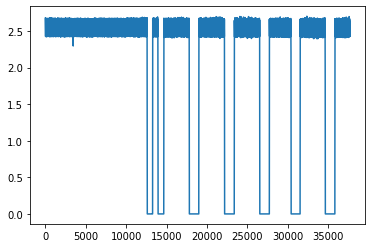

In [10]:
plt.plot(ListSensors["Sensors"][0]["Values"])

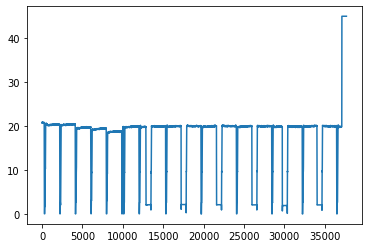

In [11]:
plt.plot(ListSensors["Sensors"][16]["Values"])

In [12]:
def creation_alerts(name_sensor,window,begin_at_zero = True,alert_type_1 = 0.55,alert_type_2 = 0.5):

    values_sensor = creation_sensor(name_sensor)
    if begin_at_zero:
        sensor_discord = matrix_profile(values_sensor.values,window)
    else:
        sensor_discord = matrix_profile(values_sensor.values[10000:],window)

    max_sensor = max(sensor_discord['mp'])
    min_sensor = min(sensor_discord['mp'])
    profile_sensor = []

    for j in sensor_discord['mp']:
        profile_sensor.append(Lerp(j,max_sensor,min_sensor))

    if not begin_at_zero:
        list_sensor_discords = [0]*10000
        profile_sensor = list_sensor_discords + profile_sensor


    #plt.plot(values_sensor.values)
    plt.plot(profile_sensor)
    plt.axhline(y = alert_type_1, color = 'r', linestyle = '-')
    plt.axhline(y = alert_type_2, color = 'y', linestyle = '-')

    sensor_alert_1 = [0]*len(profile_sensor)
    sensor_alert_2 = [0]*len(profile_sensor)

    for i in range(len(profile_sensor)):
        if profile_sensor[i] > alert_type_1:
            sensor_alert_1[i] = 1
        elif profile_sensor[i] > alert_type_2:
            sensor_alert_2[i] = 1

    list_adjustment = [0]*(window-1)
    sensor_alert_1 = list_adjustment + sensor_alert_1
    sensor_alert_2 = list_adjustment + sensor_alert_2
    print(name_sensor + " len_alert: " + str(len(sensor_alert_2)))
    return [sensor_alert_1,sensor_alert_2]

def alerts_to_json(n,alerts1,alerts2):
    sensor_to_list = [{"Name": n, "Alerts1": alerts1, "Alerts2": alerts2}]
    list_alerts = {"multipleAlerts":sensor_to_list}
    return list_alerts

DPIT301 len_alert: 37700
LIT401 len_alert: 37700
P205 len_alert: 37700
AIT202 len_alert: 37700
MV301 len_alert: 37700


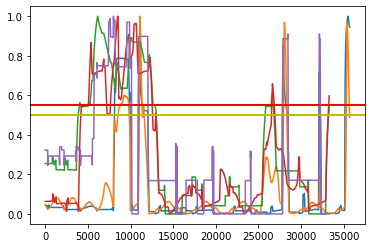

In [13]:
list_alerts_2000= ["DPIT301", "LIT401"]
list_alerts_4400 = ["P205", "AIT202"]
sensor_to_unity = []
list_empty = [0]*37700
for alert in list_alerts_2000:
    alerts_to_unity = creation_alerts(alert,2000)
    sensor_to_list = {"Name": alert, "Alerts1": alerts_to_unity[0], "Alerts2": alerts_to_unity[1]}
    sensor_to_unity.append(sensor_to_list)

for alert in list_alerts_4400:
    alerts_to_unity = creation_alerts(alert,window = 4400,begin_at_zero=True)
    sensor_to_list = {"Name": alert, "Alerts1": alerts_to_unity[0], "Alerts2": alerts_to_unity[1]}
    sensor_to_unity.append(sensor_to_list)

alerts_to_unity = creation_alerts("MV301",window=4400,begin_at_zero=True)
sensor_to_list = {"Name": "MV301", "Alerts1": alerts_to_unity[0], "Alerts2": alerts_to_unity[1]}
sensor_to_unity.append(sensor_to_list)

sensor_to_unity.append({"Name": "FIT101", "Alerts1": list_empty, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "FIT201", "Alerts1": list_empty, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "MV201", "Alerts1": list_empty, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "LIT101", "Alerts1": list_empty, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "P101", "Alerts1": list_empty, "Alerts2": list_empty})

sensor_to_unity.append({"Name": "Training0", "Alerts1": list_training_alert0, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "Training1", "Alerts1": list_training_alert1, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "Training2", "Alerts1": list_training_alert2, "Alerts2": list_empty})
sensor_to_unity.append({"Name": "Training3", "Alerts1": list_training_alert3, "Alerts2": list_empty})


export_alerts = {"multipleAlerts":sensor_to_unity}

with open('D:\_ProjetsUnity\ProjetVisus\Assets\Resources\SWaT3000alerts.json', 'w') as f:
    json.dump(export_alerts, f)

In [14]:
for key, value in export_alerts.items() :
    print(key)
for key, value in export_alerts["multipleAlerts"][0].items() :
    print(key)

multipleAlerts
Name
Alerts1
Alerts2


P205 len_alert: 37700


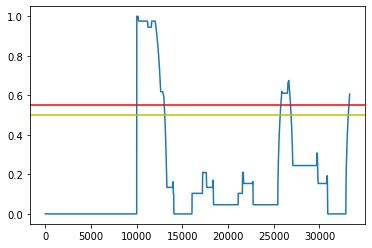

In [15]:
list = creation_alerts("P205",begin_at_zero=False,window=4400)

Training0


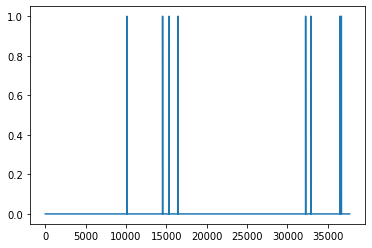

In [16]:
plt.plot(export_alerts["multipleAlerts"][4]["Alerts2"])
print(export_alerts["multipleAlerts"][10]["Name"])

In [17]:
def CreateBarAlert(name,alerts):
    l=len(alerts["Alerts2"])
    h,w = 1024,l+20
    data = np.zeros((h,w, 3), dtype=np.uint8)
    for k in range(len(alerts["Alerts2"])):
        x = [255,255,255]
        if alerts["Alerts1"][k]==1:
            x = [255,0,0]
        if alerts["Alerts2"][k]==1:
            x = [255,255,0]
        data[0:1024,k+1:k+2]=x
        data[0:1024,0:10]=[0,0,0]
        data[0:1024,l:l+10]=[0,0,0]

    #data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
    #data[0:256, 256:512] = [255, 255, 0] # red patch in upper left
    img = Image.fromarray(data, 'RGB')
    img.save(name)
    img.show()

In [18]:
CreateBarAlert("C:\\Users\Delcombel\Desktop\Alerts.png",export_alerts["multipleAlerts"][11])

In [19]:
DPIT301 = creation_sensor('DPIT301')
DPIT301discord = matrix_profile(DPIT301.values,2000)
print(len(DPIT301.values))
print(len(DPIT301discord['mp']))

37700
35701


In [20]:
max_mp = max(DPIT301discord['mp'])
min_mp = min(DPIT301discord['mp'])

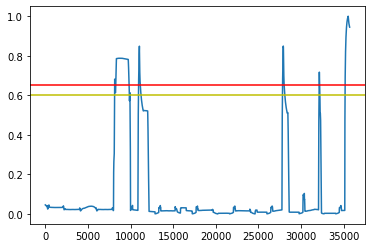

In [21]:
profile_dpit301 = []
for k in DPIT301discord['mp']:
    profile_dpit301.append(Lerp(k,max_mp,min_mp))

plt.plot(profile_dpit301)
a1 = 0.65
a2 = 0.6
plt.axhline(y = a1, color = 'r', linestyle = '-')
plt.axhline(y = a2, color = 'y', linestyle = '-')

dpit301_alert_1 = [0]*len(profile_dpit301)
dpit301_alert_2 = [0]*len(profile_dpit301)
for k in range(len(profile_dpit301)):
    if profile_dpit301[k] > a1:
        dpit301_alert_1[k] = 1
    elif profile_dpit301[k] > a2:
        dpit301_alert_2[k] = 1

list_ajustement = [0]*1999 # window - 1
dpit301_alert_1 = list_ajustement + dpit301_alert_1
dpit301_alert_2 = list_ajustement + dpit301_alert_2

## dpit301_alert_2 = [item for item in profile_dpit301 if item > alert_type_2]

37700


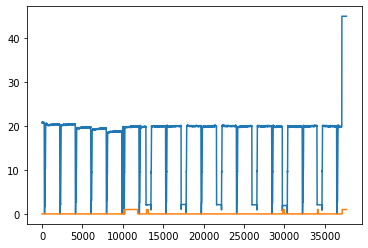

In [22]:
print(len(dpit301_alert_1))
plt.plot(DPIT301.values)
plt.plot(dpit301_alert_1)

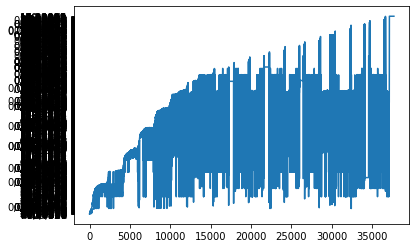

In [23]:
plt.plot(df_SWaT2['DPIT301'][1:])

In [24]:
#LIT401a = df_attack['LIT401'].apply(lambda x: x.replace(',', '.')).astype('float32')
#LIT401n = df_normal['LIT401'].apply(lambda x: x.replace(',', '.')).astype('float32')
DPIT301n = df_normal['DPIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
DPIT301a = df_attack['DPIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
FIT101 = df['FIT101'].apply(lambda x: float(str(x).replace(',', '.'))).astype('float32')
FIT201 = df['FIT201'].apply(lambda x: float(str(x).replace(',', '.'))).astype('float32')
MV201 = df['MV201'].apply(lambda x: float(str(x).replace(',', '.'))).astype('float32')
DPIT301 = pd.concat([DPIT301n[3000:13000],DPIT301a[116000:144000]],ignore_index=True)
#LIT401 = pd.concat([LIT401n[3000:13000],LIT401a[116000:144000]],ignore_index=True)
LIT301a = df_attack['LIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
LIT301n = df_normal['LIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
LIT301 = pd.concat([LIT301n[3000:13000],LIT301a[116000:144000]],ignore_index=True)

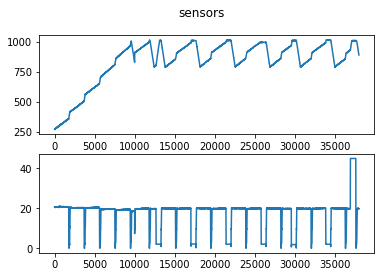

In [25]:
fig, axs = plt.subplots(2)
fig.suptitle('sensors')
axs[1].plot(DPIT301)
axs[0].plot(LIT301)

In [26]:
AIT202 = creation_sensor('AIT202')
AIT202_discord = matrix_profile(AIT202.values,2000)

In [27]:
MV301 = creation_sensor('MV301')
MV301_discord = matrix_profile(MV301.values,2000)

In [28]:
P205 = creation_sensor('P205')
P205_discord = matrix_profile(P205.values,2000)

In [29]:

P101 = creation_sensor('P101')
P101_discord = matrix_profile(P101.values,500)

In [30]:
LIT101 = creation_sensor('LIT101')
LIT101_discord = matrix_profile(LIT101.values,2000)

In [31]:
print("LIT401")
LIT401profile = mp.compute(LIT401.values,windows=500)
LIT401discord = mp.discover.discords(LIT401profile,k=10)
figures = mp.visualize(LIT401discord)

LIT401


NameError: name 'LIT401' is not defined

In [ ]:
p = mp.compute(DPIT301.values,windows=2000,n_jobs=-1)
DPIT301discord = mp.discover.discords(p,exclusion_zone=2000,k=5)
figures = mp.visualize(DPIT301discord)
print(DPIT301discord['discords'])
plt.plot(DPIT301.values)
for discord in DPIT301discord['discords']:
    dt = discord
    val = 0
    plt.plot(dt, val, c='r', marker='*', markersize=10)


In [ ]:
print("FIT101")
FIT101profile = mp.compute(FIT101.values[:3600*24],windows=700)
FIT101discord = mp.discover.discords(FIT101profile,k=10)
figures = mp.visualize(FIT101discord)

In [ ]:
print("FIT201")
FIT201profile = mp.compute(FIT201.values[:3600*24],windows=700)
FIT201discord = mp.discover.discords(FIT201profile,k=10)
figures = mp.visualize(FIT201discord)

In [ ]:
print("MV201")
MV201profile = mp.compute(MV201.values[:3600*24],windows=700)
MV201discord = mp.discover.discords(MV201profile,k=10)
figures = mp.visualize(MV201discord)


In [ ]:
df_DPIT301 = pd.read_csv(
  'D:\Datasets\SWaT\SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Attack_v0_CSV.csv',header = 1)
df_DPIT301 = df_DPIT301['DPIT301']
df_DPIT301.tail()



In [ ]:

s = df_SWaT2.iloc[[0]]
for k in range((s.size-1)):
    print(k)
    df_SWaT2.iloc[0,k]=df_SWaT2.iloc[0,k].replace(' ','')
    print(df_SWaT2.iloc[0,k])
    if df_SWaT2.iloc[0,k]==" MV201":
        print('sdf')


In [ ]:
print(df_SWaT2.iloc[0,2])

In [ ]:
with open('_SWaT.json', 'w') as f:
    json.dump(ListSensors, f)

In [ ]:
df = pd.DataFrame({'Name':[values.keys()],'Values':val})
df.head()

In [ ]:
df_SWaT2.to_json(r'D:\Code\pythonProject\SWaT.json',orient="split", index = False)

In [ ]:
#df_DARPA = pd.read_csv('D:\Datasets\DARPA\weekHTTP.csv')
df_DARPA = pd.read_csv('D:\Datasets\DARPA\week2outside.csv')
df_DARPA.head()
print(df_DARPA.dtypes)

In [ ]:
df_DARPA['Time'] =pd.to_datetime(df_DARPA['Time'])
df_DARPA.head(20)

In [ ]:
df2=df_DARPA.groupby([df_DARPA["Time"].dt.hour, "Source","Destination"])["No."].count().to_frame(name="Count")
df2.head()

In [ ]:
df2.to_json(r'D:\Code\pythonProject\export.json',orient="table")

In [ ]:
df1=df_DARPA.groupby([df_DARPA["Time"].dt.hour, "Source","Destination","Protocol"])["No."].count().reset_index()
df1.head(20)

In [ ]:
df_new = df1.rename(columns={'No.': 'Count'})
df_new.head(10)

In [ ]:
nbrTime = df_new['Time'].nunique()
print(nbrTime)
nbrSource = df_new['Source'].nunique()
print(nbrSource)
nbrDestination = df_new['Destination'].nunique()
print(nbrDestination)

Times = df_new.Time.unique()
print(len(Times))
print(Times)
Sources = df_new.Source.unique()
print(len(Sources))
print(Sources)
Destinations = df_new.Destination.unique()
print(len(Destinations))
print(Destinations)

In [ ]:

Informations = {
  "Times": Times.tolist(),
  "Sources": Sources.tolist(),
  "Destinations": Destinations.tolist()
}
with open('Informations.json', 'w') as f:
    json.dump(Informations, f)

In [ ]:
max_index = np.where(DPIT301 == np.amax(DPIT301))
plt.plot(DPIT301[:30000])

for k in range(len(max_index[0])):
    print(max_index[0][k])
    if max_index[0][k+1]-max_index[0][k]>1:
        print('ici')